In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

**READ ME.**
* PLEASE DONT MAKE ANY CHANGES TO THE EXISTING CODE.
* ADD A NEW CODE CELL/BLOCK TO WORK.
* EXPLAIN THE CODE SHORTLY AFTER THE CODE CELL/BLOCK USING THE MARKDOWN OPTION.
* DONT USE RUN ALL, BECAUSE IN CASE THERE IS A LOOP FOR ALL IMAGES IN THE FILE IT MIGHT CRASH THE SERVER.
* COMMENT OUT THE LOOPS TO AVOID CRASHES

In [2]:
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [3]:
import os

Importing important libraries like numpy,pandas,keras,sklearn,cv2
**NOTE- imshow() under cv2 doesnt work**

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

It enable every cell to show multiple views and results.

In [5]:
#df = pd.read_csv(r'../input/fungiclef2022/DF20-train_metadata.csv')
#df.head()

Checking if the data input is working
**.head() returns first 5 rows from the csv file**

In [6]:
#df.info()

returns the columns in the .csv file

In [7]:
#print('All categories : \n ', df['phylum'].unique())
#print('All categories : \n ', df['class'].unique())
#print('All categories : \n ', df['order'].unique())
#print('All categories : \n ', df['family'].unique())
#print('All categories : \n ', df['genus'].unique())
#print('All categories : \n ', df['specificEpithet'].unique())
#print('no. : \n ', df['specificEpithet'].count())\
#df["image_path"].head()

This code block is to print the different types of phylum,class,order,family,genus,and specificEpithet
**NOTE- Here specificEpithet is what we need to predict(species of the fungi)**

# IMAGE PROCESSING

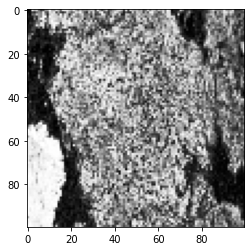

In [8]:
image = cv2.imread('../input/fungiclef2022/DF20-300px/DF20_300/2237851949-74654.jpg')
image = cv2.resize(image, (100, 100))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_enhanced = cv2.equalizeHist(gray_image)
plt.imshow(image_enhanced,'gray')
#plt.imshow(gray_image,'gray')
#cv2.imwrite('./gray/1.jpg', gray_image)

**equalizeHist-** equalizes histograms of the image for better contrast.

**for reference-** https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

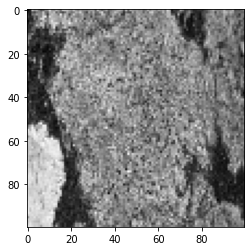

In [9]:
plt.imshow(gray_image,'gray')

Image processing for a single image
**TRIAL RUN**

In [10]:
"""def imgopen(img_name):
    img = cv2.imread('../input/fungiclef2022/DF20-300px/DF20_300/'+img_name, 0)
    return img
for img_name in df['image_path']:
    plt.imshow(imgopen(img_name.lower()))
    #plt.show()"""

"def imgopen(img_name):\n    img = cv2.imread('../input/fungiclef2022/DF20-300px/DF20_300/'+img_name, 0)\n    return img\nfor img_name in df['image_path']:\n    plt.imshow(imgopen(img_name.lower()))\n    #plt.show()"

In [11]:
def imgopen(img_name):
    img = cv2.imread('../input/fungiclef2022/DF20-300px/DF20_300/'+img_name)
    img=cv2.resize(img,(150,150))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    enhanced = cv2.equalizeHist(gray)
    return enhanced

Function for processing images

In [12]:
os.mkdir('./gray')

To create a folder to store all processed images

In [13]:
"""for img_name in df['image_path']:
    cv2.imwrite('./gray/'+img_name.lower(),imgopen(img_name.lower()))"""

"for img_name in df['image_path']:\n    cv2.imwrite('./gray/'+img_name.lower(),imgopen(img_name.lower()))"

Loop to process all the images and store it in the gray folder.

**PLEASE DONT REMOVE THE COMMENT AND RUN THE BLOCK AS IT CRASHES THE SERVER**